<a href="https://colab.research.google.com/github/FaizanHameed1/Facial-Expression-Recognition/blob/main/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#giving directory 
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive


In [3]:
#cd /content/gdrive/My Drive/Kaggle

In [4]:
#Downloading dataset by copying API from kaggle
#!kaggle datasets download -d msambare/fer2013

In [5]:
#Run only once to unzip the Dataset
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip


In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [7]:
from tensorflow import keras
from keras.models import Sequential

from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D, Convolution2D
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.core import Dropout,Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation

In [8]:
#In the drive we made a folder with the name "FER_2013 Dataset"
#cd /content/gdrive/My Drive/Kaggle/FER_2013 Dataset
%cd /content/gdrive/My Drive/Kaggle/FER_2013 Dataset

/content/gdrive/My Drive/Kaggle/FER_2013 Dataset


In [9]:
#Check the present working directory
import os
os.getcwd()

'/content/gdrive/My Drive/Kaggle/FER_2013 Dataset'

In [10]:
!ls

my_model.h5  test  train  training.log


In [11]:
#direction of our train and test dataset
train_direct = '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/'
test_direct = '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/test/'

In [12]:
os.listdir(train_direct)#these are different folders in train dataset

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [13]:
os.listdir(test_direct)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [14]:
#accessing each folder in train data
for folder in os.listdir(train_direct):
  print(folder)

angry
disgust
fear
happy
neutral
sad
surprise


In [15]:

#train_folder_directory=[]#Making the directory of every folder in training set
#class_dict_train={}#Dict to save the number of immages in each class in test set
#for folder in os.listdir(train_direct):
#  fold_direct=train_direct + folder
#  train_folder_directory.append(fold_direct)
#  class_dict_train[folder]=len(os.listdir(fold_direct))

#print(train_folder_directory)
#print(class_dict_train)

In [16]:
#test_folder_directory=[]#Making the directory of every folder in test set
#class_dict_test={}#Dict to save the number of immages in each class in test set
#for folder in os.listdir(test_direct):
#  fold_direct=test_direct + folder
#  test_folder_directory.append(fold_direct)
#  class_dict_test[folder]=len(os.listdir(fold_direct))

#print(test_folder_directory)
#print(class_dict_test)

In [17]:
#we can made a function for upper two cells code plus some extra features

def immages_in_class(path_dir):
  immage_directory=[]#Making the directory of every folder in test set(We may or may not require in future)
  class_dict={}#Dict to save the number of immages in each class in test set
  immages_class_dict={}#dictionary of immages files in different classis
  #folder_directory=[]
  count=0
  for folder in os.listdir(path_dir):
    fold_direct=path_dir + folder
    #folder_directory.append(fold_direct)
    class_dict[folder]=len(os.listdir(fold_direct))
    immages=[]
    for immage in os.listdir(fold_direct):
      count+=1
      image_direct=fold_direct+"/"+immage
      immage_directory.append(image_direct)
      immages.append(immage)
    immages_class_dict[folder]=immages

  return class_dict,immages_class_dict,immage_directory,count


In [18]:
train_classes,train_immage_classis,train_immages_directory,train_immage_count= immages_in_class(train_direct)
test_classes,test_immage_classis,test_immages_directory,test_immage_count= immages_in_class(test_direct)
#classis and no of immages in each class
print(f'No of immages in each class in train set: {train_classes}')
print(f'No of immages in each class in test set: {test_classes}')

No of immages in each class in train set: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 2692, 'sad': 90, 'surprise': 0}
No of immages in each class in test set: {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


In [19]:
#Immages in different classis
print(f'immages in different classis of train set: {train_immage_classis}')
print(f'immages in different classis of test set: {test_immage_classis}')

immages in different classis of train set: {'angry': ['Training_66358229.jpg', 'Training_81825721.jpg', 'Training_82592067.jpg', 'Training_72476694.jpg', 'Training_33935037.jpg', 'Training_59177525.jpg', 'Training_98956544.jpg', 'Training_33634496.jpg', 'Training_56620705.jpg', 'Training_55564125.jpg', 'Training_43095847.jpg', 'Training_980394.jpg', 'Training_42633275.jpg', 'Training_93527115.jpg', 'Training_91558476.jpg', 'Training_64706269.jpg', 'Training_46676243.jpg', 'Training_50449072.jpg', 'Training_92340867.jpg', 'Training_36806417.jpg', 'Training_33837916.jpg', 'Training_69951949.jpg', 'Training_35638545.jpg', 'Training_90101092.jpg', 'Training_42906621.jpg', 'Training_83154911.jpg', 'Training_94891631.jpg', 'Training_67792239.jpg', 'Training_67857943.jpg', 'Training_94196223.jpg', 'Training_88051794.jpg', 'Training_37962103.jpg', 'Training_88999463.jpg', 'Training_43801995.jpg', 'Training_45362636.jpg', 'Training_54302671.jpg', 'Training_83402648.jpg', 'Training_62720547.jpg'

In [20]:
#Immages directory(may or may not be used)
print(f'list of train set immage directory : {train_immages_directory}')
print(f'list of test set immage directory: {test_immages_directory}')

list of train set immage directory : ['/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_66358229.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_81825721.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_82592067.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_72476694.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_33935037.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_59177525.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_98956544.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_33634496.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_56620705.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_55564125.jpg', '/content/gdrive/My Drive/Kaggle/FER_2013 Dataset/train/angry/Training_43095847.jpg', '/content/gdrive

In [21]:
#Total number of immages in training and test set
print(f'number of immages in training set: {train_immage_count}')
print(f'number of immages in test set: {test_immage_count}')

number of immages in training set: 18525
number of immages in test set: 7178


In [22]:
#checking the shape of immages
one_img = cv2.imread(train_immages_directory[1])
one_img.shape

(48, 48, 3)

In [23]:
#classis/emotions in training set
train_immage_classis.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [24]:
#classis/emotions in test set
test_immage_classis.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [25]:
#total classis in train set
print(f'totla number of classis in train set: {len(train_immage_classis.keys())}')

totla number of classis in train set: 7


In [26]:
#total classis in test set
print(f'totla number of classis in test set: {len(test_immage_classis.keys())}')

totla number of classis in test set: 7


In [27]:
train_classes.values()

dict_values([3995, 436, 4097, 7215, 2692, 90, 0])

In [28]:
test_classes.values()

dict_values([958, 111, 1024, 1774, 1233, 1247, 831])

In [29]:
#Plotting some of immages in training dataset
def plot_immage(start,end,immage_place):
  #j=1
  for x in train_immages_directory[start:end]:
    
    # reading image from directory
    image = cv2.imread(x)
    
    #plt.subplot(1,5,j)
    # calling imshow() using plt object
    plt.imshow(image)
    plt.title(x.split('/')[7])#splitting along slash and getting the emotion at 7th position
    # displaying the image
    plt.show()
    #j+=1

_________Some of immages in training data____________


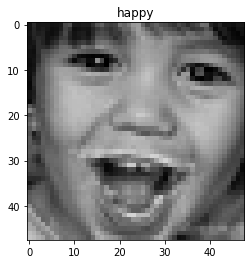

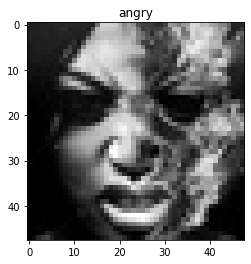

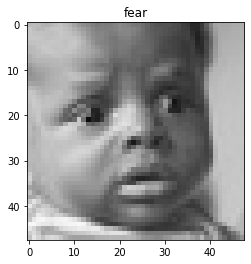

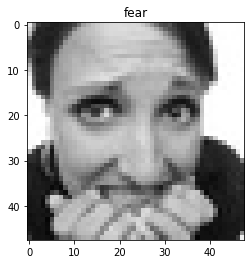

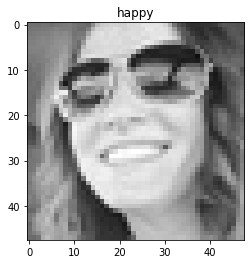


_________Some of immages in test data____________


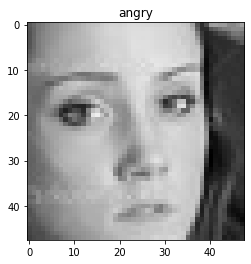

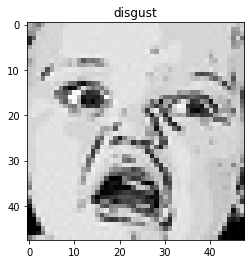

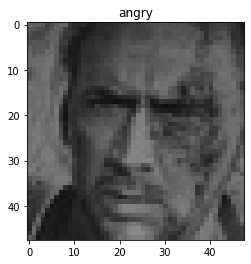

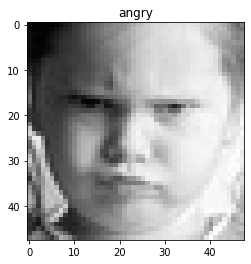

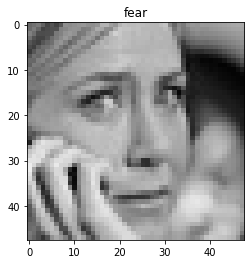

In [30]:
#first we randomly shuffle lists so that we can plot the immage randomly
train_list=random.shuffle(train_immages_directory)
test_list=random.shuffle(test_immages_directory)
print("_________Some of immages in training data____________")
plot_training=plot_immage(10,15,train_list)# plotting some immages in training set
print("")
print("_________Some of immages in test data____________")
plot_test=plot_immage(100,105,test_list)# plotting some immage sin test set

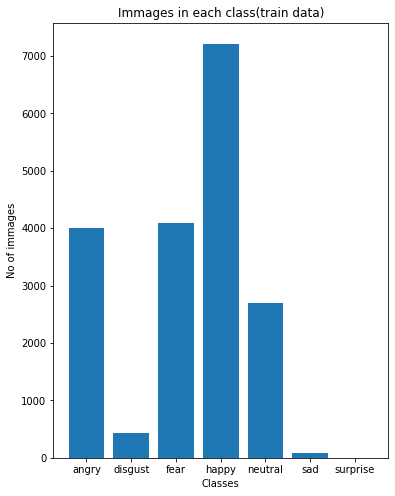

In [31]:
#Immages in every class(training data)
plt.figure(figsize=(6,8))
plt.bar(train_classes.keys(),train_classes.values())
plt.xlabel("Classes")
plt.ylabel('No of immages')
plt.title("Immages in each class(train data)")
plt.show()


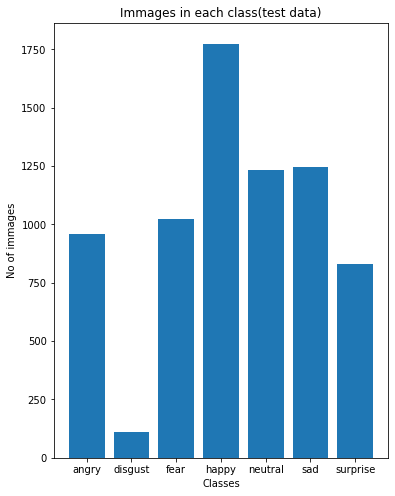

In [32]:
#Immages in every class(test data)
plt.figure(figsize=(6,8))
plt.bar(test_classes.keys(),test_classes.values())
plt.xlabel("Classes")
plt.ylabel('No of immages')
plt.title("Immages in each class(test data)")
plt.show()


In [33]:
#ImageDataGenerator accepts an input batch of images, randomly transforms the batch, and then returns randomly transformed data(without returning the orignal data).
#ImageDataGenerator augment the immage in real time while our model is still training.

In [34]:
#To Generalize model we are going to use Data Augmentation
#using .flow_from_directory(directory)
#Check https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator for further info (Also check how to use if using .flow(x, y)  )

train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range = 0.1,height_shift_range = 0.1,shear_range=0.2,horizontal_flip=True)#ImageDataGenerator Generate batches of tensor image data with real-time data augmentation.
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(train_direct,target_size=(48, 48),batch_size=64,class_mode='categorical',color_mode='grayscale')#48 rows and 48 columns
validation = test_datagen.flow_from_directory(test_direct,target_size=(48, 48),batch_size=64,class_mode='categorical',color_mode='grayscale')#test or validation set

Found 18525 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:
#Checking the given seven classes
train.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [36]:
#TensorFlow/Keras required use of a method called .fit_generator in order to accomplish data augmentation.

In [37]:
#building the model
from keras import regularizers
model = Sequential() 

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48,48,1)))#48 rows and 48 columns(immage size =48x48). one is shape extension for 2d.also it is a gray scale immage
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01))) 
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(1024, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
    
model.add(Dense(7, activation='softmax'))#There are 7 classes


In [38]:
#input_shape = (None,48,48,1)#We have to write 4-D input to 2D CNN. i.e(batch size,height,width,depth), We can also add input to main model instead of building here
#model.build(input_shape) 

In [39]:
#Compliling the model
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
#getting summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [40]:
#To get control over training process we have to introduce callback. to help to automate some tasks after every training/epoch.
mod_path='my_model.h5'#mod_path is filepath: the file path where we want to save our model. It is used in checkpoint
from keras.callbacks import ModelCheckpoint
#This callback saves the model after every epoch
checkpoint = ModelCheckpoint(filepath=mod_path,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)#filepath: the file path where we want to save our model. It is used in checkpoint


#from keras.callbacks import EarlyStopping
#To avoid overfitting early stopping is used
#earlystop = EarlyStopping(monitor = 'val_loss',
#                          min_delta = 0,
#                          patience = 3,
#                          verbose = 1,
#                          restore_best_weights = True)


from keras.callbacks import CSVLogger
#This callback streams epoch results to a csv file
csv_logger = CSVLogger('training.log')


from keras.callbacks import ReduceLROnPlateau
#callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

#from keras.callbacks import TensorBoard
#This callback writes a log for TensorBoard, which is TensorFlow’s excellent visualization tool. 
#If we installed tensorflow with pip than we can launch TensorBoard from the command line: tensorboard — logdir=/full_path_to_your_logs
#log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [checkpoint,csv_logger, reduce_lr]

In [41]:
train.n #number of training examples

18525

In [42]:
validation.n #number of test/validation examples

7178

In [43]:
train.batch_size #mentioned in "train"

64

In [44]:
validation.batch_size #mentioned in "validation" 

64

In [45]:
#Since the function is intended to loop infinitely, Keras has no ability to determine when one epoch starts and a new epoch begins.

#Therefore, we compute the steps_per_epoch value as the total number of training data points divided by the batch size.
# Once Keras hits this step count it knows that it’s a new epoch.
#for more details check https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/

In [46]:
steps_per_epoch = train.n // train.batch_size #If we have a training set of the fixed size you can ignore it.It is useful if we have a huge data set or 
#if we are generating random data augmentations on the fly, i.e. infinite size. steps_per_epoch is batches of samples to train.
validation_steps = validation.n // validation.batch_size #If we have a validation dataset fixed size you can ignore it
print(f"steps per epoch: {steps_per_epoch}")
print(f"validation steps: {validation_steps}")

steps per epoch: 289
validation steps: 112


In [47]:
#The call to .fit is making two primary assumptions here:

#Our entire training set can fit into RAM
#There is no data augmentation going on (i.e., there is no need for Keras generators)

#Real-world datasets are often too large to fit into memory.
#They also tend to be challenging, requiring us to perform data augmentation to avoid overfitting and increase the ability of our model to generalize.
#In those situations we need to utilize Keras’ .fit_generator function
#See https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/ for more details

In [ ]:
#Model Training
history=model.fit(x=train,validation_data=validation,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps,epochs=60,callbacks=callbacks)
model.save_weights('first_try.h5')  # always save weights after training or during training

Epoch 1/60
 76/289 [======>.......................] - ETA: 2:06:51 - loss: 19.8426 - accuracy: 0.1996

Due to internet problem i am stopping the training process here.

In [ ]:
import pickle
#Saving the model
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#Reloading the model

#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
test_loss, test_accuracy = model.evaluate(validation)
train_loss, train_accuracy = model.evaluate(train)
print(f'model test loss:{test_loss}')
print(f'model test accuracy:{test_accuracy}')
print(f'model train loss:{train_loss}')
print(f'model train accuracy:{train_accuracy}')

In [ ]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()